In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn = pd.read_csv("Churn_Modelling.csv")
churn

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [ ]:
churn.shape

(10000, 14)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
churn.duplicated().sum()

0

In [ ]:
data = churn.copy()
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [ ]:
data.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [ ]:
data.describe(include="object").T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [ ]:
data[data["Geography"]=="France"].value_counts().sum()

5014

In [ ]:
per_churn = data[data["Exited"]==1].value_counts().sum()/(len(data))*100

print(f"The churn ratio is: {per_churn:.1f}%")

The churn ratio is: 20.4%


# **EDA**

In [ ]:
# # Create pandas profile
# # !pip install pandas-profiling[notebook]

# import pandas_profiling

# # Generate the profile report
# profile = df.profile_report(title='Pandas Profiling Report')
# # Save the report as an HTML file
# profile.to_file(output_file='ChurnReport.html')

### Functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate analysis

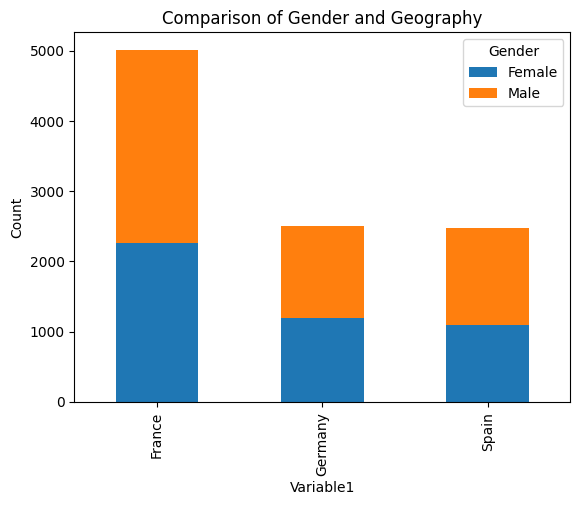

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the two categorical variables
grouped_data = churn.groupby(["Geography", "Gender"]).size().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel("Variable1")
plt.ylabel("Count")
plt.title("Comparison of Gender and Geography")

# Display the chart
plt.show()

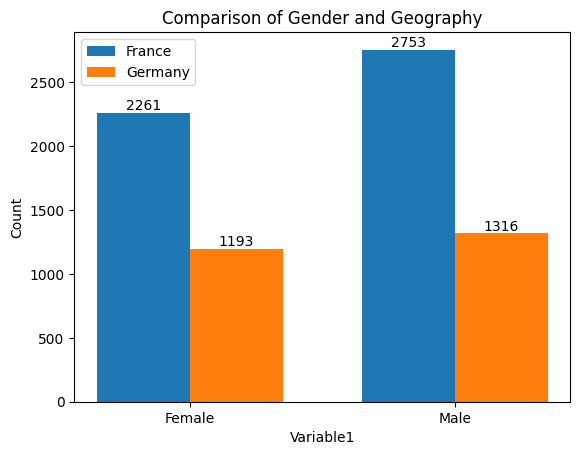

In [65]:
grouped_data = churn.groupby(["Gender", "Geography"]).size().unstack()

# Get the categories and their count for both variables
categories1 = grouped_data.index
categories2 = grouped_data.columns

# Set the width of each bar
bar_width = 0.35

# Create an array of indices for the x-axis ticks
x = np.arange(len(categories1))

# Plot the grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, grouped_data.loc[:, categories2[0]], width=bar_width, label=categories2[0])
bar2 = ax.bar(x + bar_width/2, grouped_data.loc[:, categories2[1]], width=bar_width, label=categories2[1])


# Add count labels to each bar
for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.text(rect1.get_x() + rect1.get_width()/2, height1, height1, ha='center', va='bottom')
    ax.text(rect2.get_x() + rect2.get_width()/2, height2, height2, ha='center', va='bottom')

# Set the x-axis labels and tick labels
ax.set_xticks(x)
ax.set_xticklabels(categories1)

# Set the x-axis labels and tick labels
ax.set_xticks(x)
ax.set_xticklabels(categories1)

# Set the labels and title
ax.set_xlabel("Variable1")
ax.set_ylabel("Count")
ax.set_title("Comparison of Gender and Geography")

# Add a legend
ax.legend()

# Display the chart
plt.show()

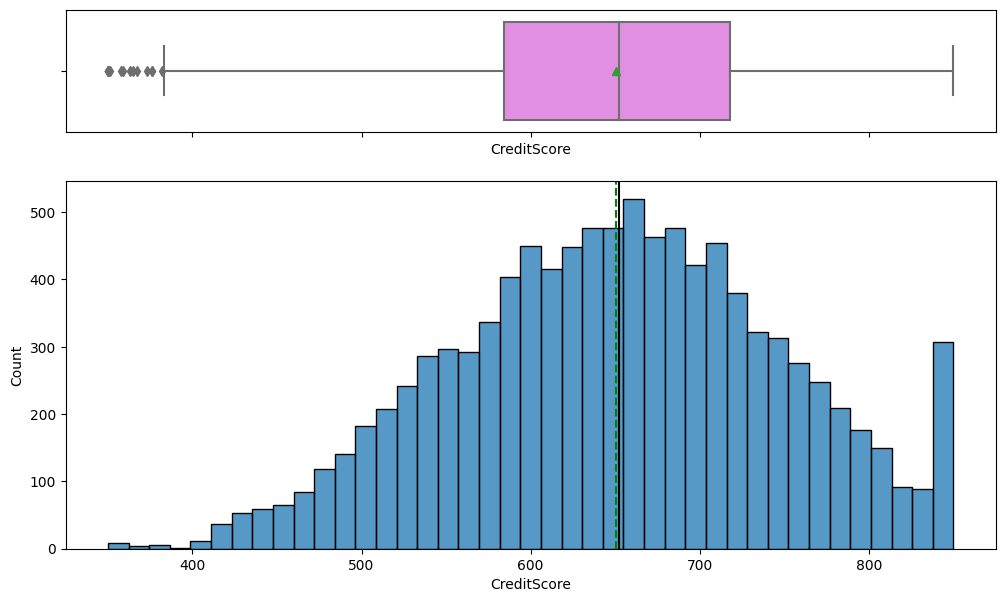

In [ ]:
histogram_boxplot(data, "CreditScore")

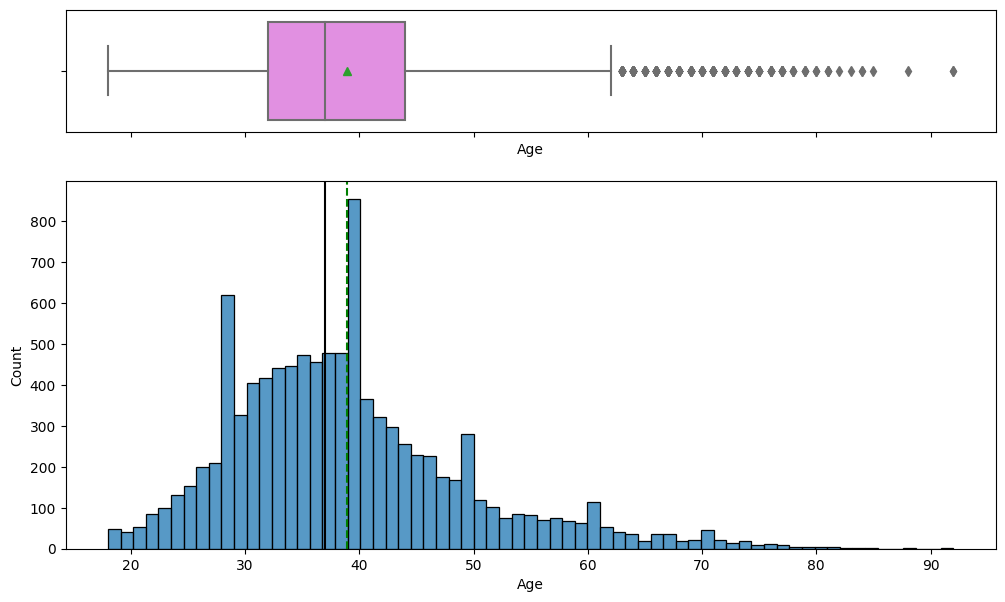

In [ ]:
histogram_boxplot(data, "Age")

In [ ]:
# histogram_boxplot(df, "Tenure")

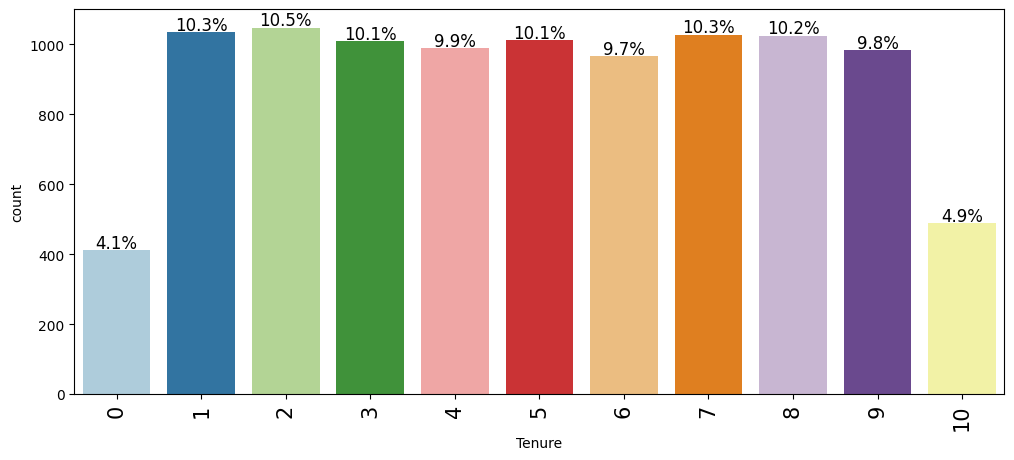

In [ ]:
labeled_barplot(data, "Tenure", perc=True)

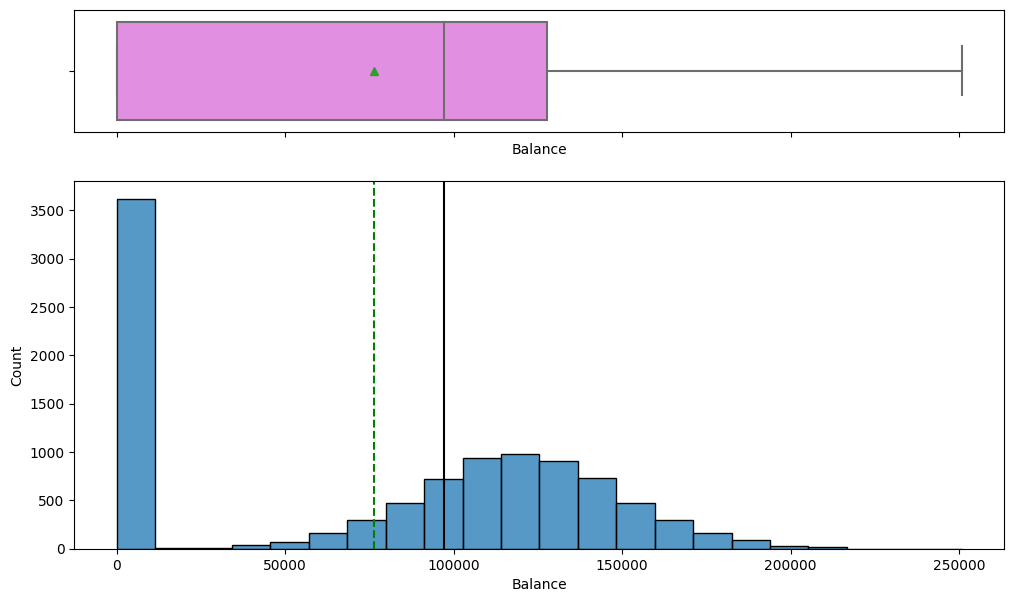

In [ ]:
histogram_boxplot(data, "Balance")

In [ ]:
# histogram_boxplot(df, "NumOfProducts")

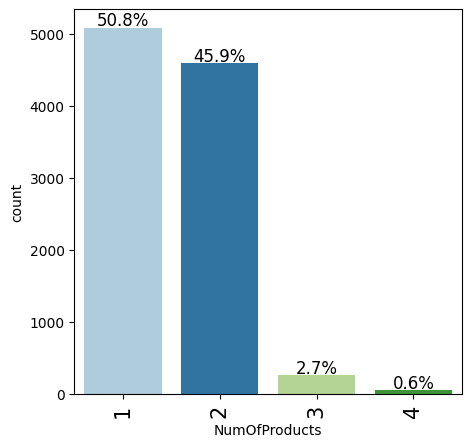

In [ ]:
labeled_barplot(data, "NumOfProducts", perc=True)

In [ ]:
# histogram_boxplot(df, "IsActiveMember")

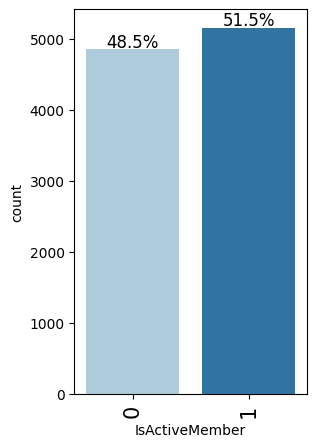

In [ ]:
labeled_barplot(data, "IsActiveMember", perc=True)

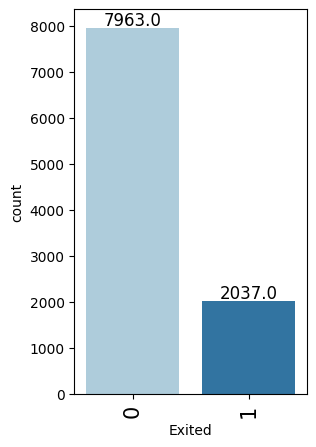

In [66]:
labeled_barplot(data, "Exited", perc=False)

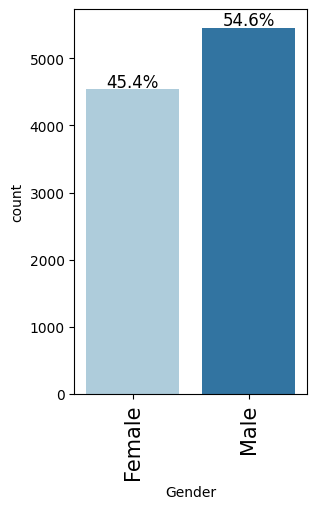

In [ ]:
labeled_barplot(data, "Gender", perc=True)

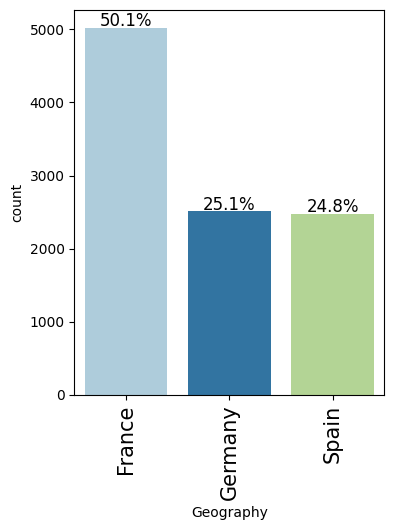

In [ ]:
labeled_barplot(data, "Geography", perc=True)

<ipython-input-13-bae05d15dc35>:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


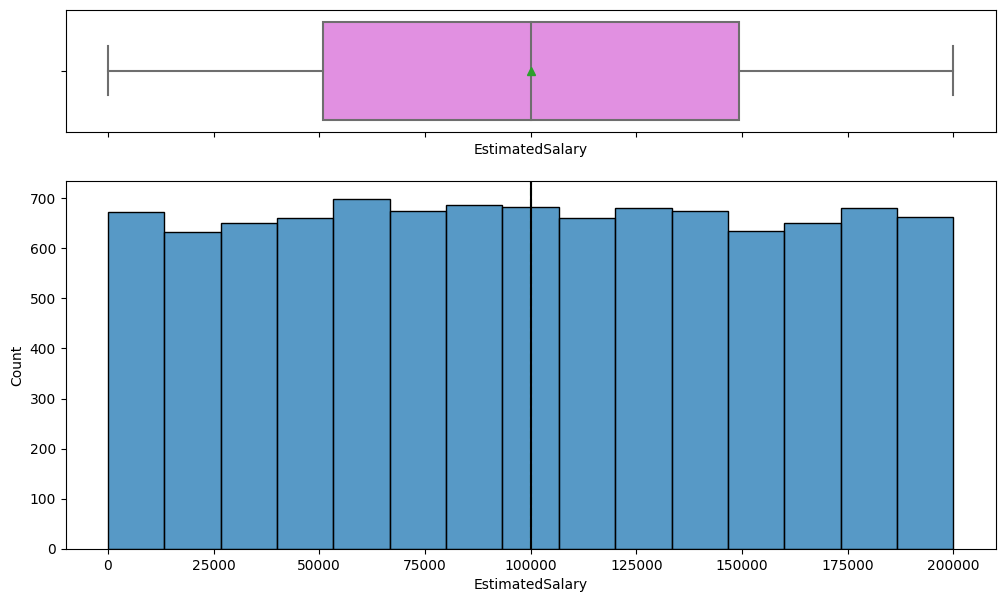

In [ ]:
histogram_boxplot(data, "EstimatedSalary", bins=15)

### Bivariate analysis

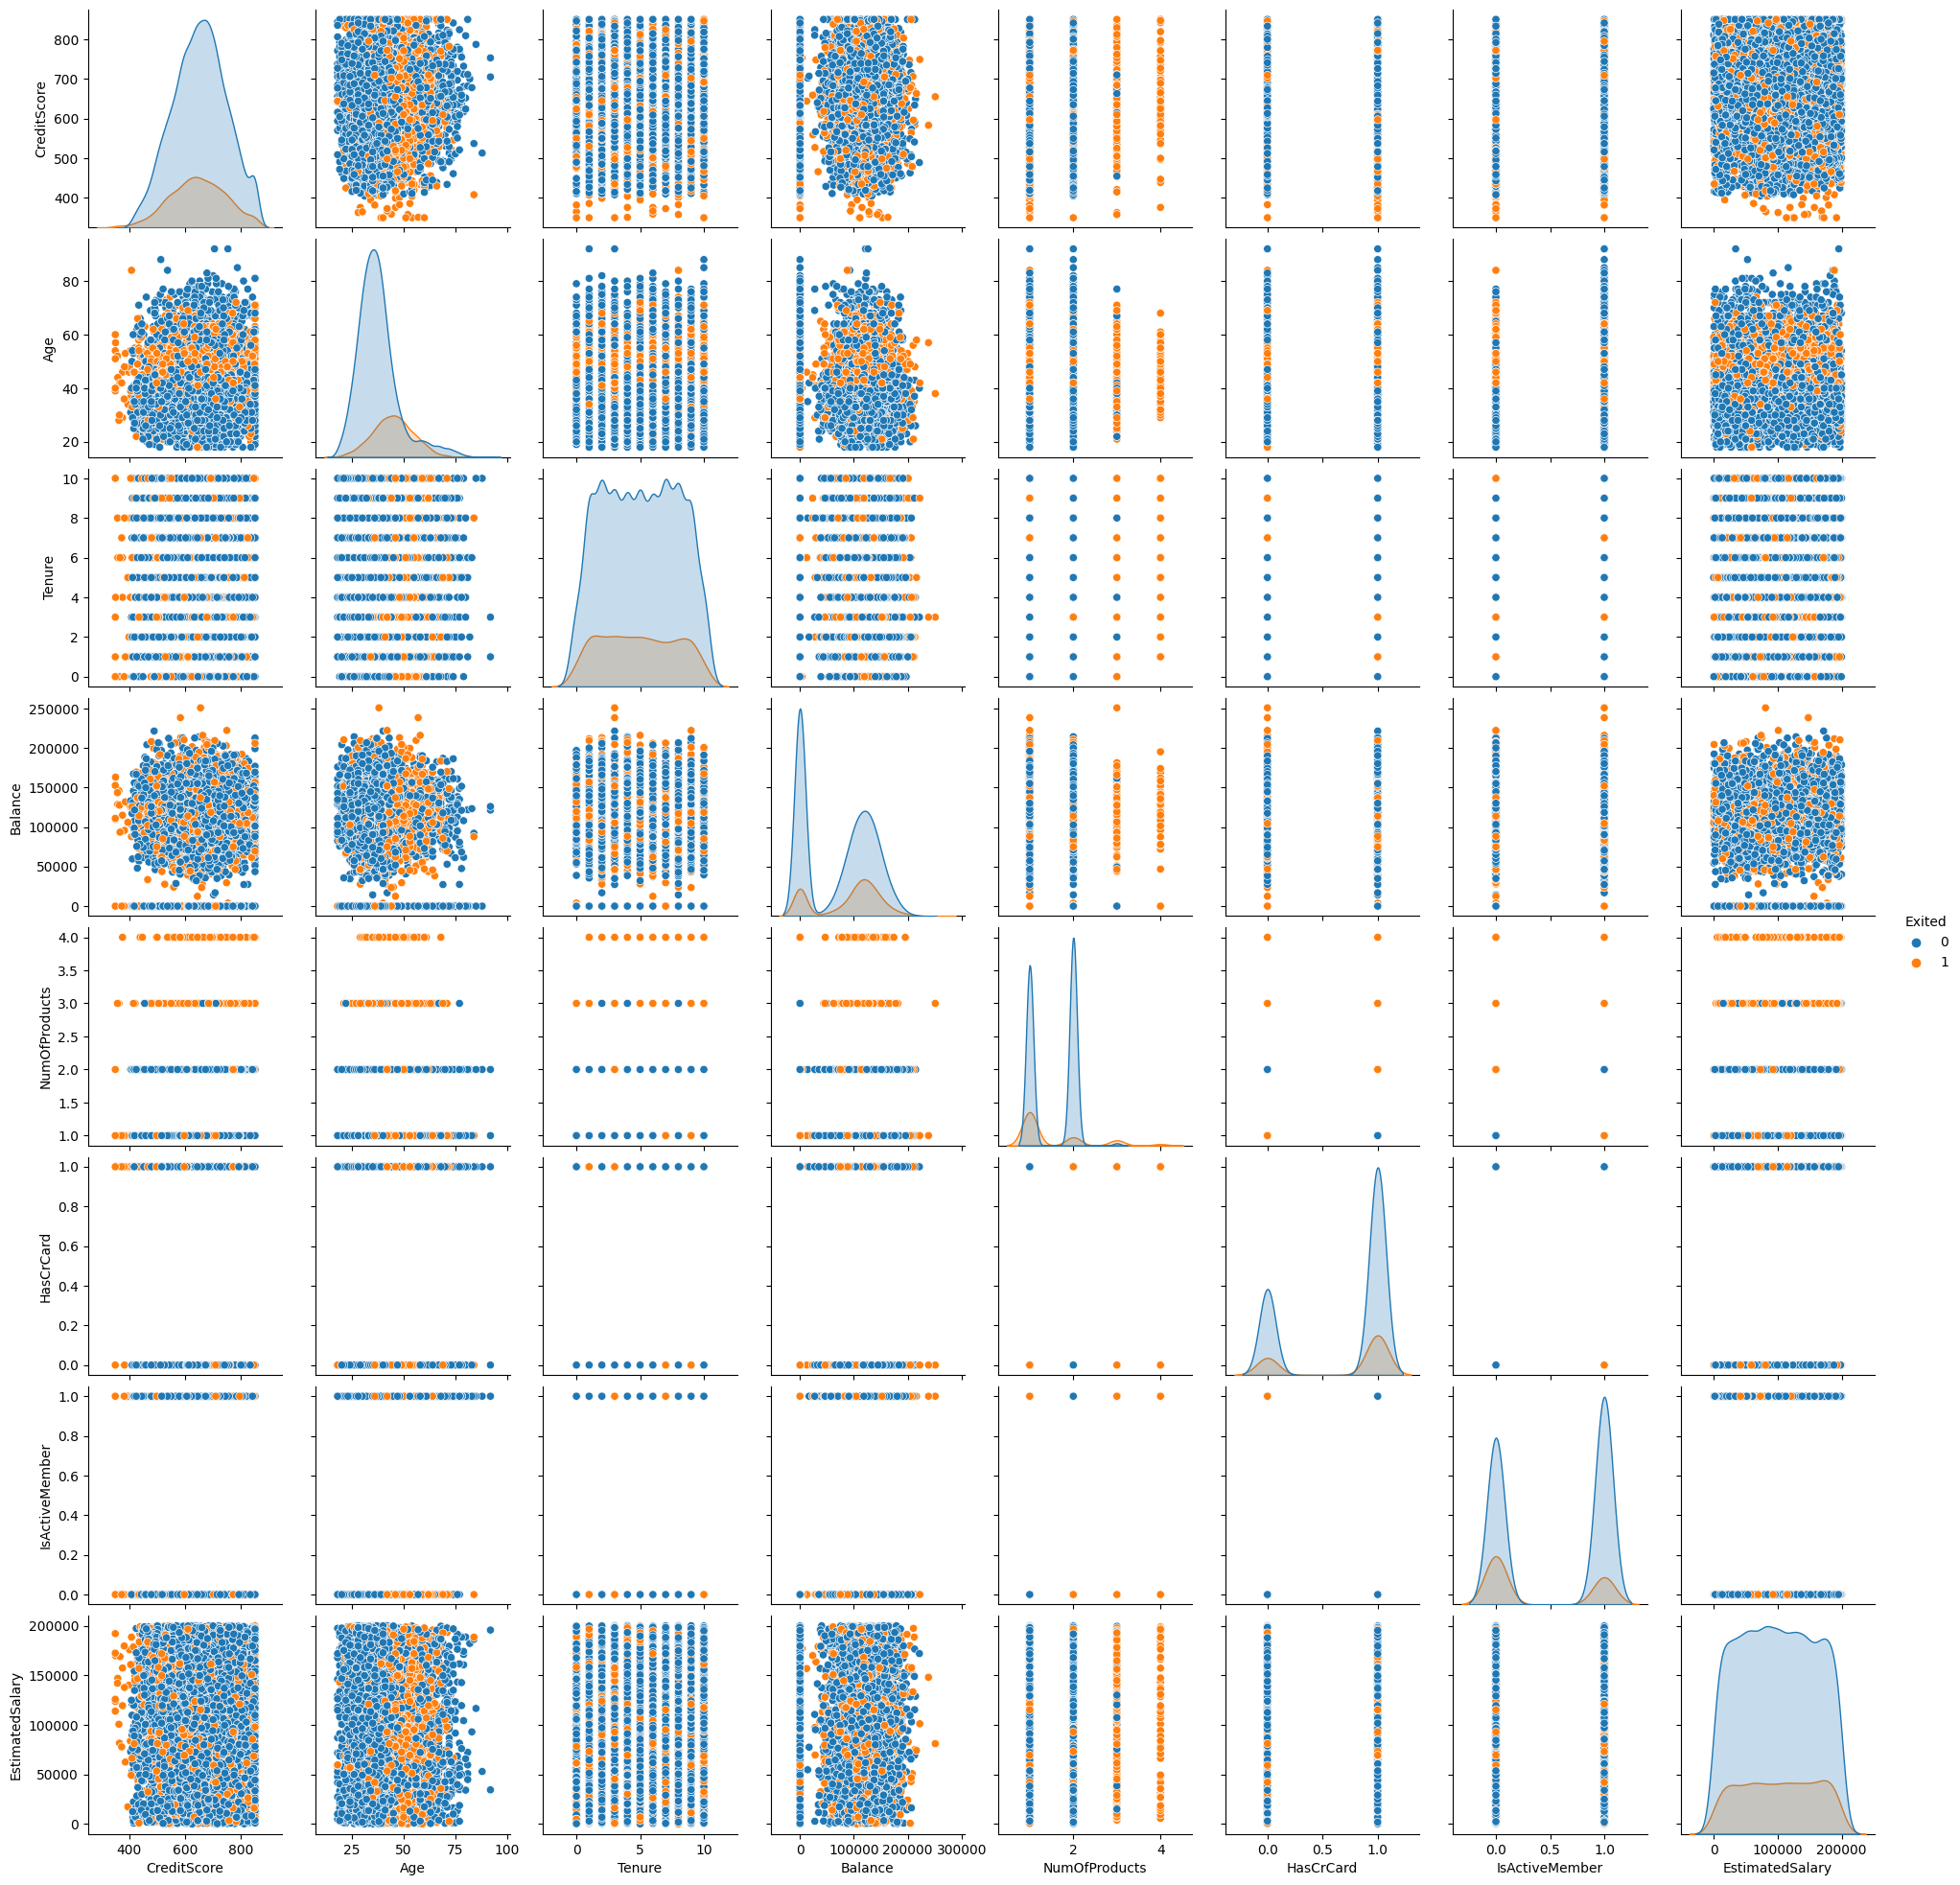

In [ ]:
# Pairplot
sns.pairplot(data=data, hue="Exited", diag_kind="kde")
plt.show()

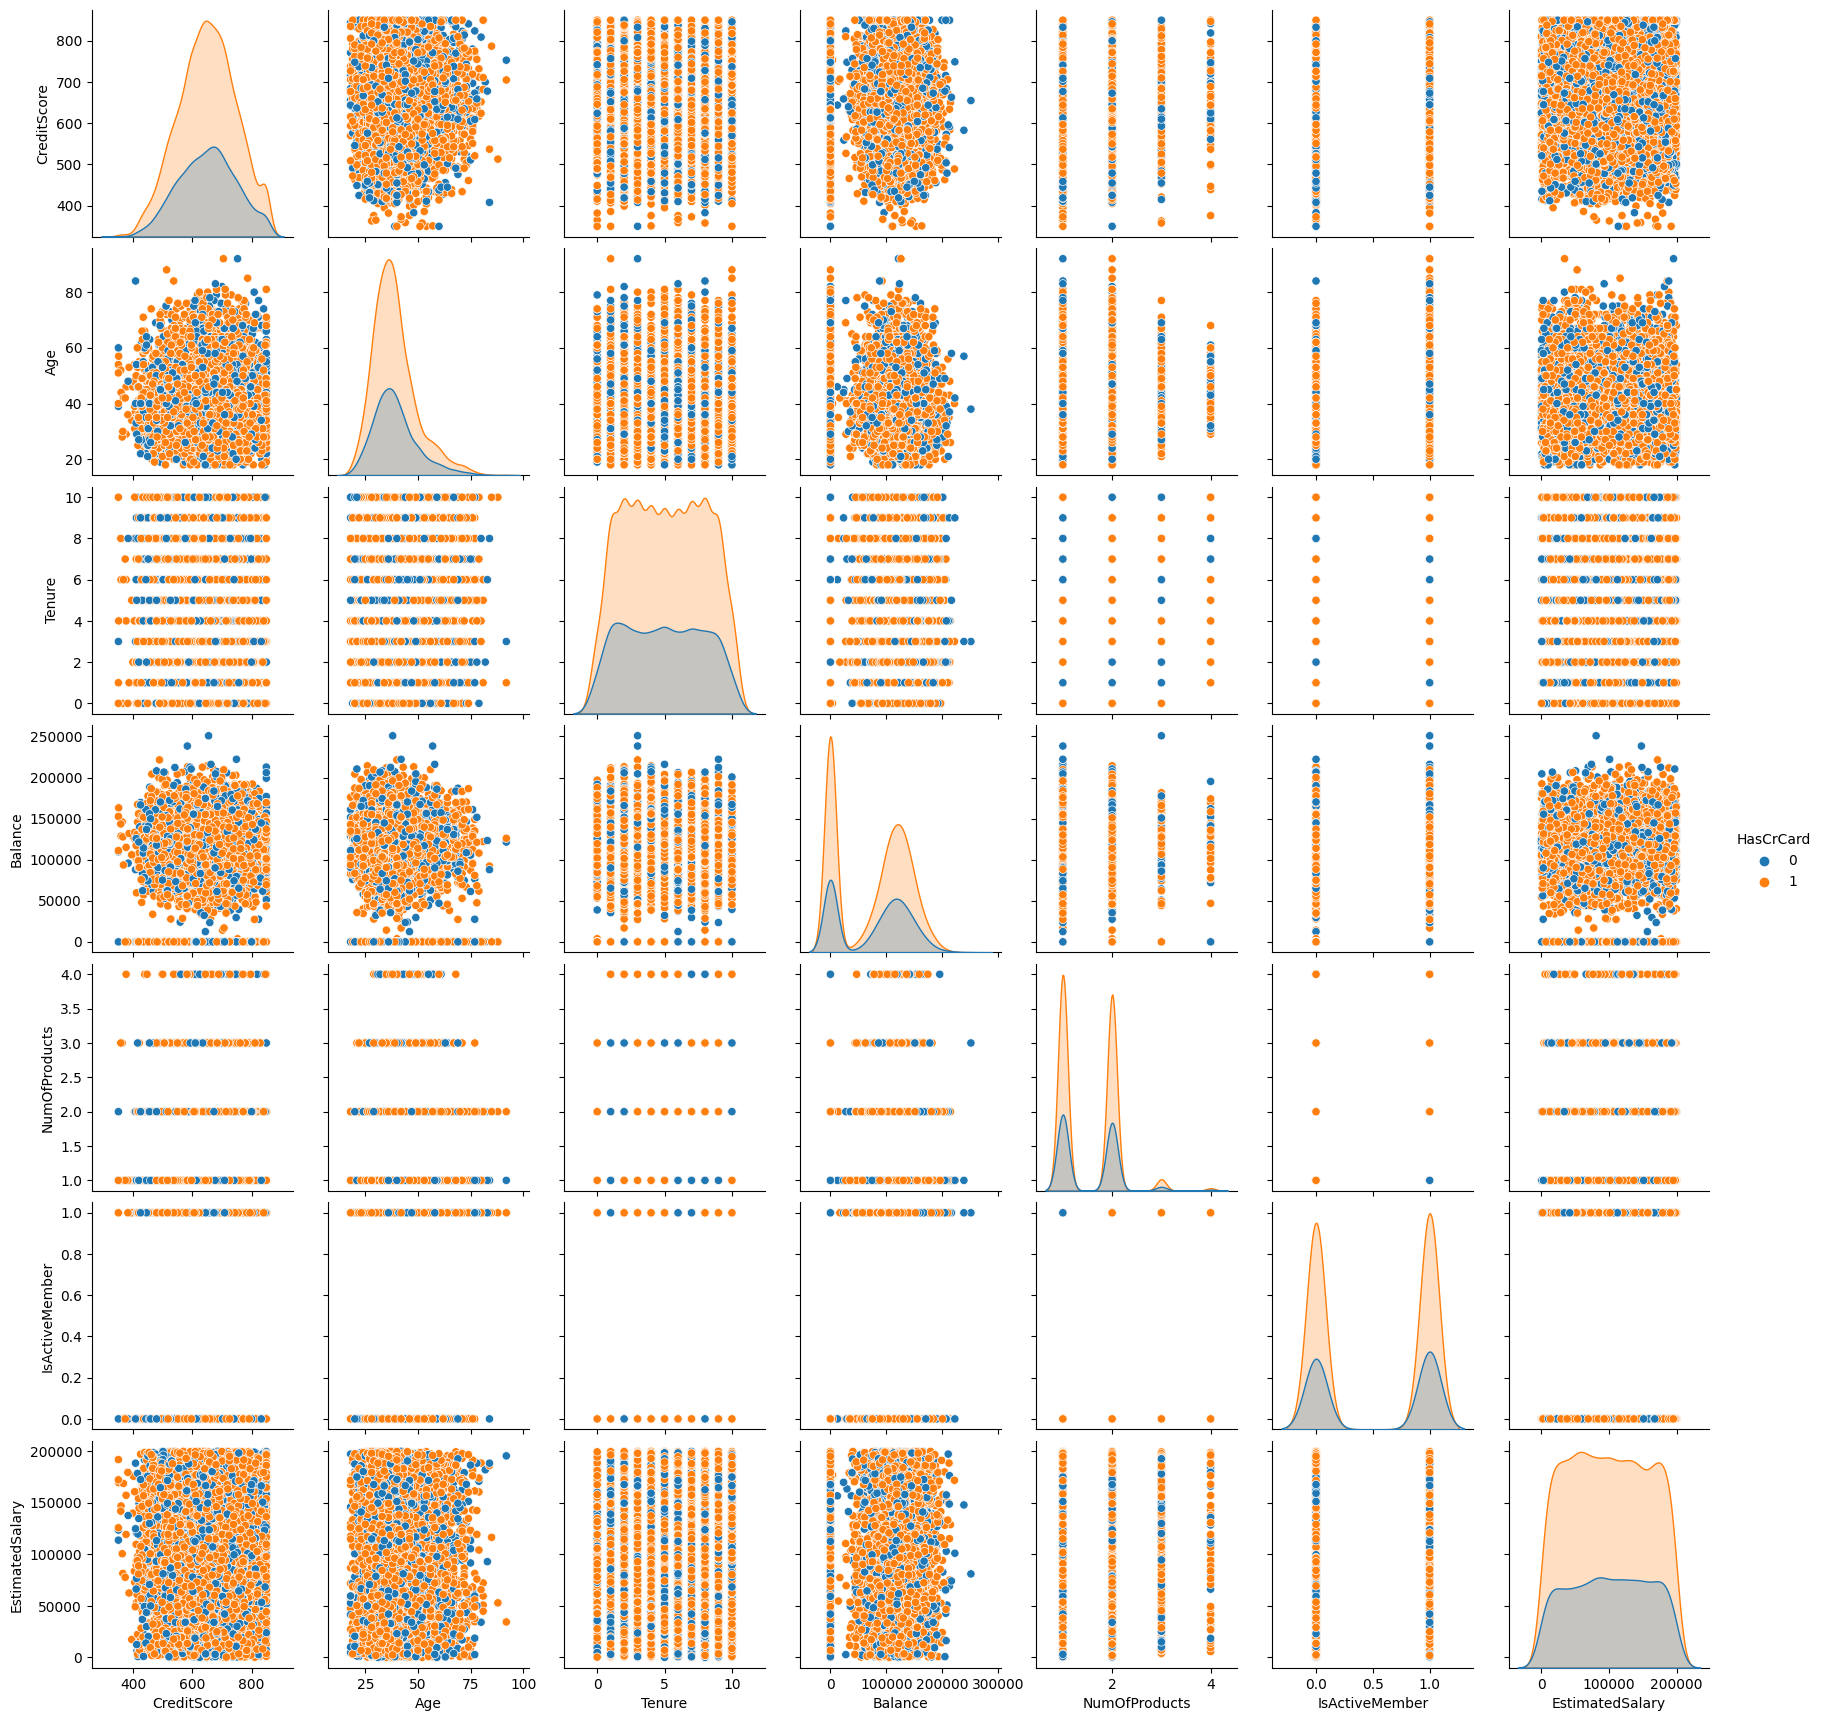

In [ ]:
# Pairplot

sns.pairplot(data=data.drop(["Exited"],axis=1),hue="HasCrCard", diag_kind="kde")
plt.show()

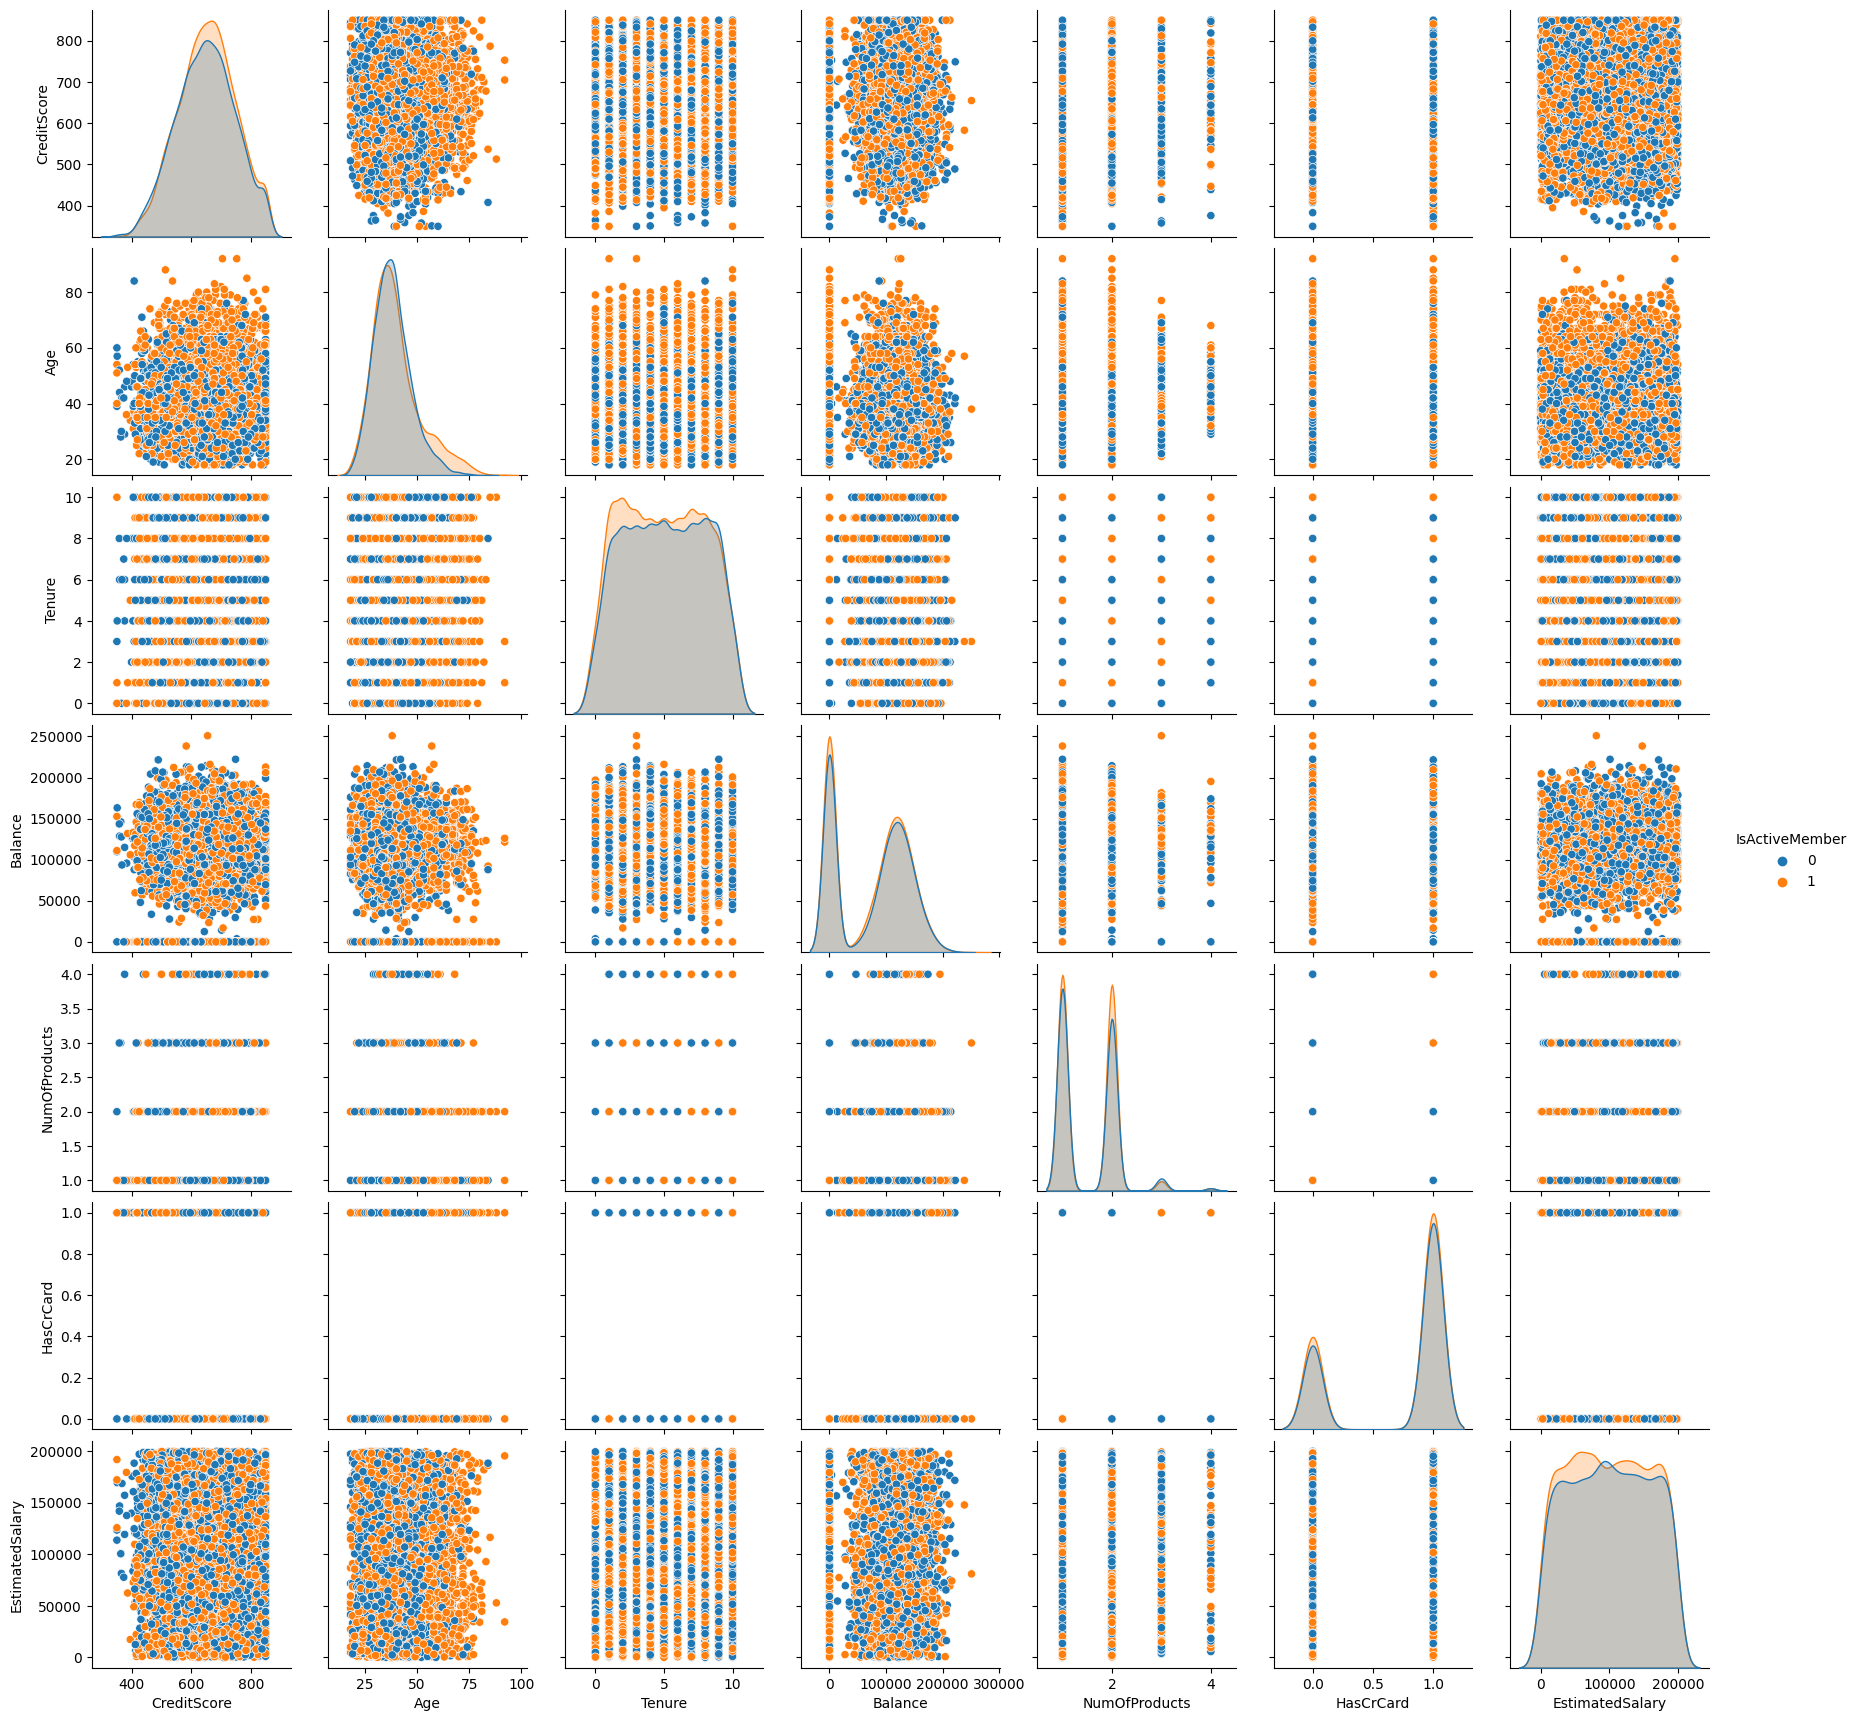

In [ ]:
# Pairplot
sns.pairplot(data=data.drop(["Exited"],axis=1),hue="IsActiveMember", diag_kind="kde")
plt.show()

<ipython-input-31-725adbd007a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")


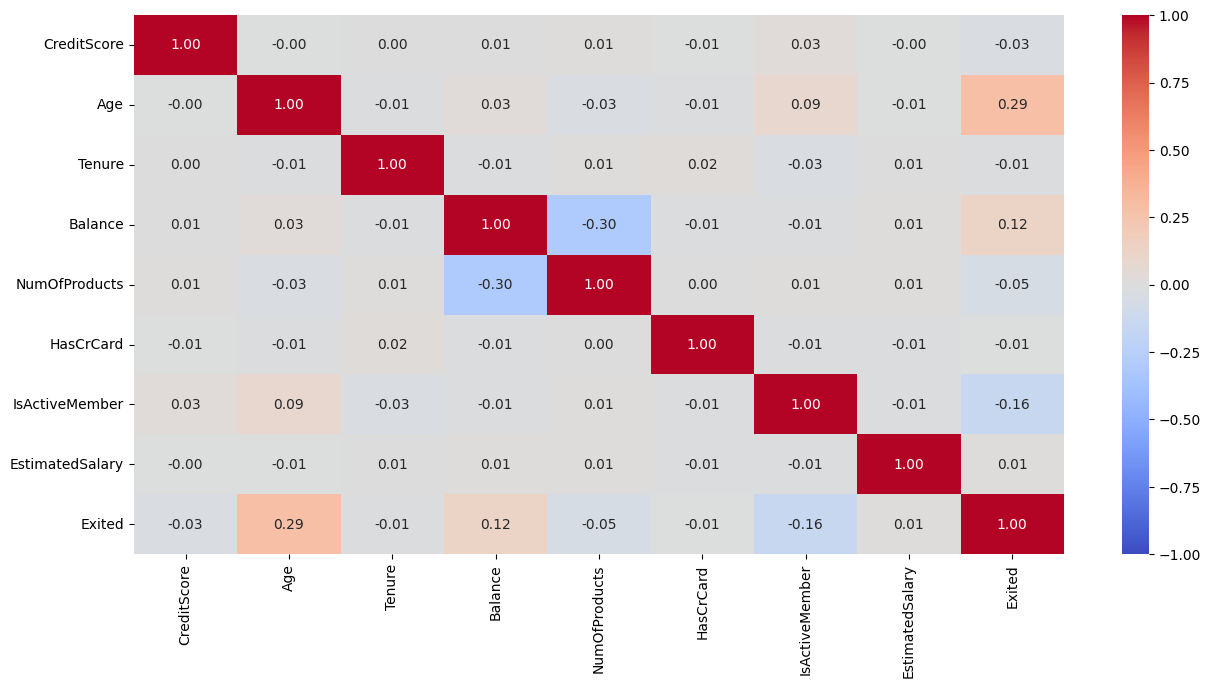

In [ ]:
# Heat map
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

<ipython-input-32-7c3e1046ec3e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="seismic")


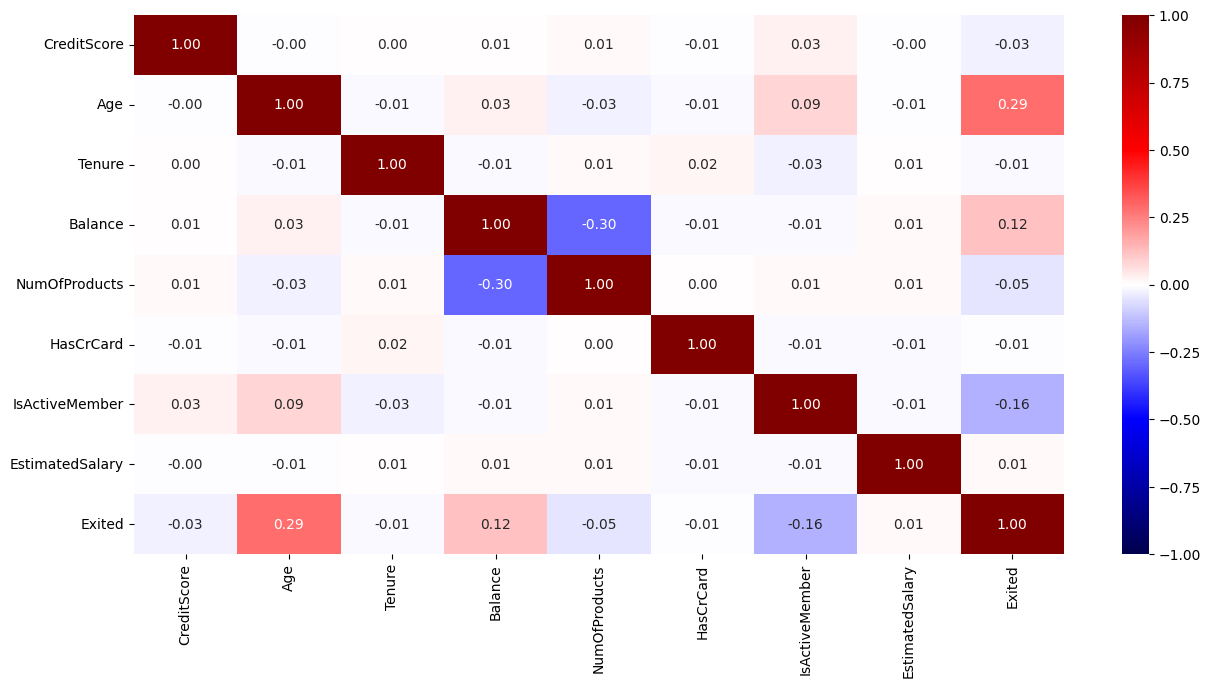

In [ ]:
# Heat map
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="seismic")
plt.show()

# **Feature Engineering & Preparing data for modeling**

In [ ]:
df = data.copy()
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [ ]:
df = pd.get_dummies(df)
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1                  1        112542.58       0                 0   
2                  0        113931.57       1                 1   
3                  0         93826.63       0                 1   
4                  1         79084.10       0                 0   
...              ...              ...     ...               ...   
9995               0         96270.64       0                 1   
9996               1        101699.77       0                 1   
9997               1         42085.58       1                 1   
9998               0         92888.52       1                 0   
9999               0         38190.78       0                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 14 columns]

In [ ]:
df.max()

CreditScore             850.00
Age                      92.00
Tenure                   10.00
Balance              250898.09
NumOfProducts             4.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      199992.48
Exited                    1.00
Geography_France          1.00
Geography_Germany         1.00
Geography_Spain           1.00
Gender_Female             1.00
Gender_Male               1.00
dtype: float64

In [ ]:
# Scale the data
df = (df-df.min())/(df.max()-df.min())
df

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000       0.000000        1.0   
1           0.516  0.310811     0.1  0.334031       0.000000        0.0   
2           0.304  0.324324     0.8  0.636357       0.666667        1.0   
3           0.698  0.283784     0.1  0.000000       0.333333        0.0   
4           1.000  0.337838     0.2  0.500246       0.000000        1.0   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000       0.333333        1.0   
9996        0.332  0.229730     1.0  0.228657       0.000000        1.0   
9997        0.718  0.243243     0.7  0.000000       0.000000        0.0   
9998        0.844  0.324324     0.3  0.299226       0.333333        1.0   
9999        0.884  0.135135     0.4  0.518708       0.000000        1.0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                1.0         0.506735     1.0               1.0   
1                1.0         0.562709     0.0               0.0   
2                0.0         0.569654     1.0               1.0   
3                0.0         0.469120     0.0               1.0   
4                1.0         0.395400     0.0               0.0   
...              ...              ...     ...               ...   
9995             0.0         0.481341     0.0               1.0   
9996             1.0         0.508490     0.0               1.0   
9997             1.0         0.210390     1.0               1.0   
9998             0.0         0.464429     1.0               0.0   
9999             0.0         0.190914     0.0               1.0   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                   0.0              0.0            1.0          0.0  
1                   0.0              1.0            1.0          0.0  
2                   0.0              0.0            1.0          0.0  
3                   0.0              0.0            1.0          0.0  
4                   0.0              1.0            1.0          0.0  
...                 ...              ...            ...          ...  
9995                0.0              0.0            0.0          1.0  
9996                0.0              0.0            0.0          1.0  
9997                0.0              0.0            1.0          0.0  
9998                1.0              0.0            0.0          1.0  
9999                0.0              0.0            1.0          0.0  

[10000 rows x 14 columns]

In [ ]:
df.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

### Train test split

In [ ]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]


X.shape, y.shape

((10000, 13), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

# first we split data into 2 parts, temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6000, 13) (2400, 13) (1600, 13)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 40)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 40)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 40)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 40)

Target value ratio in y
0.0    0.7963
1.0    0.2037
Name: Exited, dtype: float64
****************************************
Target value ratio in y_train
0.0    0.796333
1.0    0.203667
Name: Exited, dtype: float64
****************************************
Target value ratio in y_val
0.0    0.79625
1.0    0.20375
Name: Exited, dtype: float64
****************************************
Target value ratio in y_test
0.0    0.79625
1.0    0.20375
Name: Exited, dtype: float64
****************************************


In [ ]:
print("Target value ratio in y:")
print((y.value_counts(normalize=True) * 100).apply(lambda x: f"{x:.1f}%"))
print("*" * 40)
print("Target value ratio in y_train:")
print((y_train.value_counts(normalize=True) * 100).apply(lambda x: f"{x:.1f}%"))
print("*" * 40)
print("Target value ratio in y_val:")
print((y_val.value_counts(normalize=True) * 100).apply(lambda x: f"{x:.1f}%"))
print("*" * 40)
print("Target value ratio in y_test:")
print((y_test.value_counts(normalize=True) * 100).apply(lambda x: f"{x:.1f}%"))
print("*" * 40)

Target value ratio in y:
0.0    79.6%
1.0    20.4%
Name: Exited, dtype: object
****************************************
Target value ratio in y_train:
0.0    79.6%
1.0    20.4%
Name: Exited, dtype: object
****************************************
Target value ratio in y_val:
0.0    79.6%
1.0    20.4%
Name: Exited, dtype: object
****************************************
Target value ratio in y_test:
0.0    79.6%
1.0    20.4%
Name: Exited, dtype: object
****************************************


#### **Oversample the train data using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE()

# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_oversampled == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_oversampled == 0)))

Before OverSampling, count of label '1': 1222
Before OverSampling, count of label '0': 4778 

After OverSampling, count of label '1': 4778
After OverSampling, count of label '0': 4778 



# **Train the model**

## **Model Class**

#### Useful functions

In [ ]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

In [ ]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)


def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)


def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i, y[i]] = 1

  return Y

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

# def cross_entropy(Y, P_hat):        # Not a binary cross entropy loss but a generalized one.
#   return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

#### Logistic Regression

In [ ]:
# Logistic Regression

class LogisticRegression:
  def __init__(self,thresh=0.5):
    self.thresh = thresh
    self.w = None
    self.b = None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape

    # initialize weights and biases
    self.w = np.random.rand(D)
    self.b = np.random.rand(1)

    J = np.zeros(epochs)


    #Gradient Descent Loop

    for epoch in range(epochs):

      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y, p_hat)
      #weight and bias update rules
      self.w -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()


  def __forward__(self, X):
    return sigmoid(X@self.w + self.b)


  def predict(self,X):
    return (self.__forward__(X) >=self.thresh).astype(np.int32)

  def get_feature_importance(self):
    normalized_weights = np.abs(self.w) / np.sum(np.abs(self.w))
    return normalized_weights


In [ ]:
# Multivariate Logistic Regression

class MVLogsticRegresion():

  def fit(self, X, y, eta=2e-1, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape


    K = len(np.unique(y))
    y_values = np.unique(y, return_index=False)
    Y = indices_to_one_hot(y,K).astype(int)


    # Initialize weights and biases
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(N,K)

    J = np.zeros(epochs)


    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)
      # weight update rules
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)


    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()


  def __forward__(self,X):
    return softmax(X@self.W +self.B)

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)

### Shallow ANN

In [ ]:
# Shallow ANN

class Shallow_ANN():
  def fit(self, X, y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(y)
    N,D = X.shape
    K = Y.shape[1]

    # Initialize Weights
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]),1)} # l is the layer. M is the shape
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons,K],1)}
    #Define Activations
    self.a = {1: np.tanh, 2: softmax}

    J = np.zeros(epochs)


    # Gradient Descent(Optimization Step)
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y,self.Z[2])  # self.Z[2] = Z[2] is Z of layer 2. NB: The loss is calculated at the end of the network.

      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)

      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()



  def __forward__(self, X):
    self.Z ={0: X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])


  def predict(self, X):
    self.__forward__(X)

    return self.Z[2].argmax(axis=1)

## Train Logistic Regressor

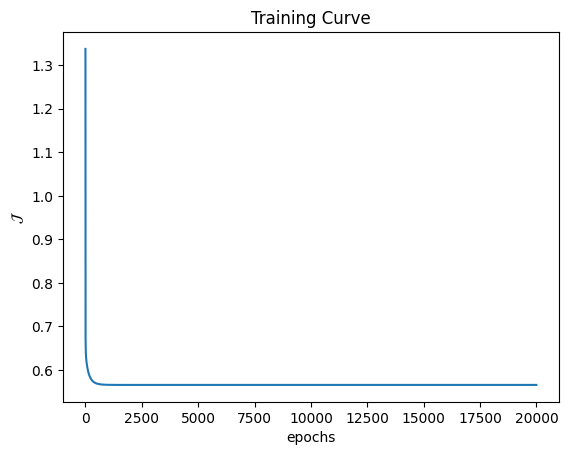

CPU times: user 1min 40s, sys: 1min 13s, total: 2min 53s
Wall time: 1min 40s


In [ ]:
%%time
logreg = LogisticRegression()
logreg.fit(X_train_oversampled, y_train_oversampled, eta=1, epochs=2e4, show_curve=True)

In [ ]:
%%time
y_train_pred = logreg.predict(X_train_oversampled)

CPU times: user 2.65 ms, sys: 5.61 ms, total: 8.26 ms
Wall time: 7.19 ms


In [ ]:
# Accuracy on Train data
trainAccuracy = accuracy(y_train_oversampled, y_train_pred)
print("Train Accuracy:", trainAccuracy)

Train Accuracy: 0.721326915027208


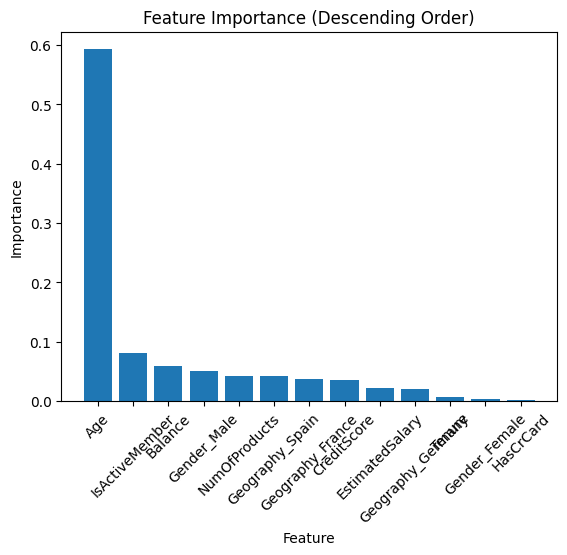

In [ ]:

feature_importance = logreg.get_feature_importance()

# Get the names of the features from X_train column names
feature_names = X_train.columns.tolist()

# Sort feature importance and feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances in descending order
plt.bar(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Descending Order)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
X_train2 = X_train_oversampled[["Age", "IsActiveMember", "Balance", "NumOfProducts", "CreditScore",
                               "Geography_Spain", "Geography_France"]]


X_val2 = X_val[["Age", "IsActiveMember", "Balance", "NumOfProducts", "CreditScore",
                "Geography_Spain", "Geography_France"]]

X_test2 = X_test[["Age", "IsActiveMember", "Balance", "NumOfProducts", "CreditScore",
                "Geography_Spain", "Geography_France"]]

y_train2 = y_train_oversampled

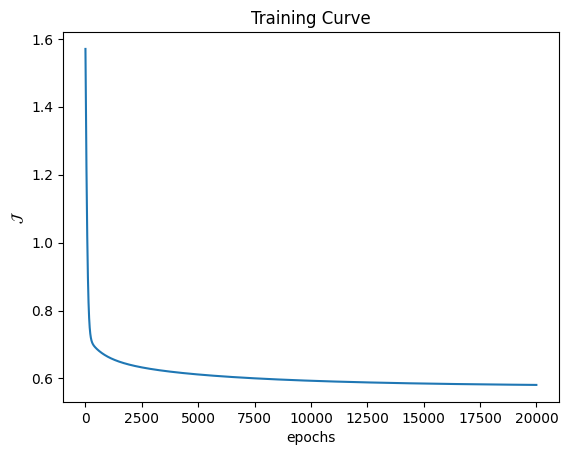

CPU times: user 1min 37s, sys: 1min 12s, total: 2min 50s
Wall time: 1min 37s


In [ ]:
%%time
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2, eta=2e-2, epochs=2e4, show_curve=True)

In [ ]:
%%time
y_train_pred2 = logreg2.predict(X_train2)

CPU times: user 3.71 ms, sys: 1.88 ms, total: 5.59 ms
Wall time: 3.84 ms


In [ ]:
trainAccuracy2 = accuracy(y_train_oversampled, y_train_pred)
print("Train Accuracy:", trainAccuracy2)

Train Accuracy: 0.721326915027208


In [ ]:
%%time
# Validation Accuracy
y_val_pred2 = logreg2.predict(X_val2)
valAccuracy2 = accuracy(y_val, y_val_pred2)
print("Validation Accuracy:", valAccuracy2)

Validation Accuracy: 0.6866666666666666
CPU times: user 5.37 ms, sys: 1.75 ms, total: 7.12 ms
Wall time: 9.72 ms


In [ ]:
%%time
# Test Accuracy
y_test_pred2 = logreg2.predict(X_test2)
testAccuracy2 = accuracy(y_test, y_test_pred2)
print("Test Accuracy:", testAccuracy2)

Test Accuracy: 0.721875
CPU times: user 5.28 ms, sys: 3.32 ms, total: 8.6 ms
Wall time: 8.05 ms


Text(0.5, 47.7222222222222, 'Predicted label')

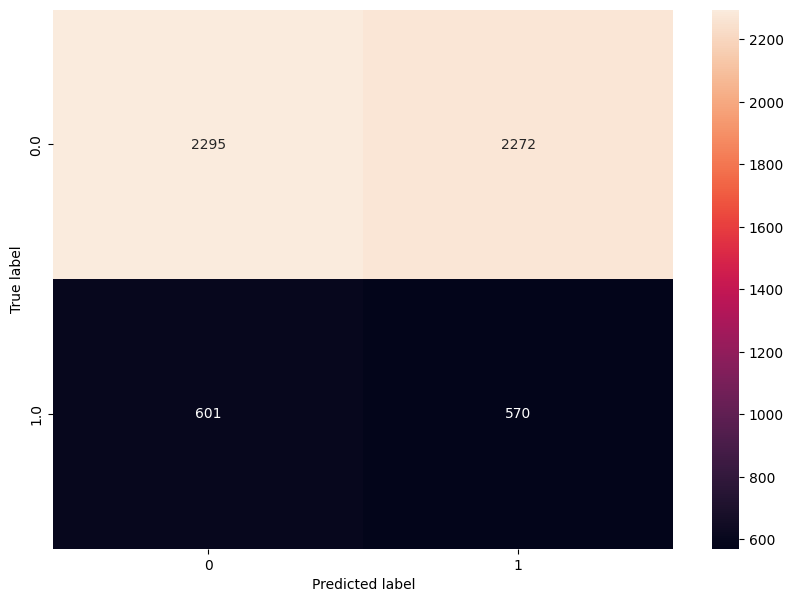

In [ ]:
# Confusion Matrix
plt.figure(figsize=(10,7))
cm = pd.crosstab(y_train, y_train_pred2)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 47.7222222222222, 'Predicted label')

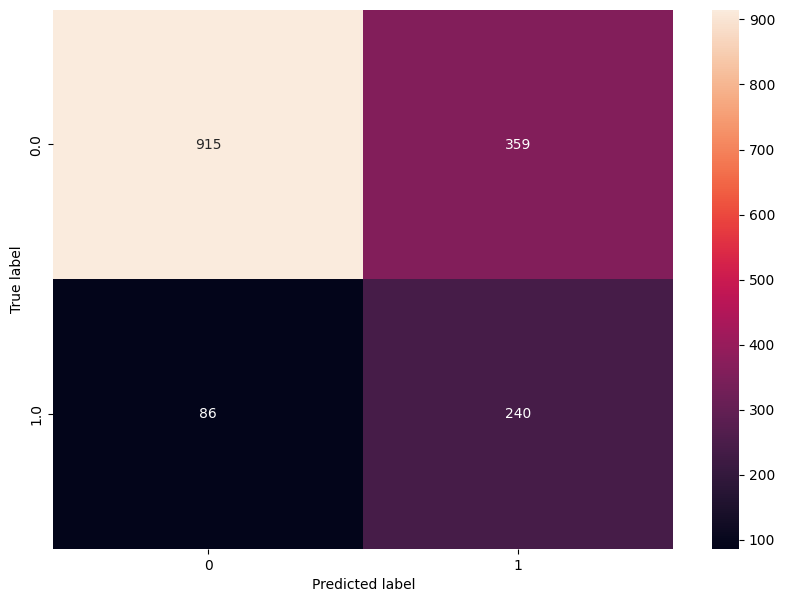

In [ ]:
# Confusion Matrix
plt.figure(figsize=(10,7))
cm = pd.crosstab(y_test, y_test_pred2)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')